In [1]:
from LocalDatabase import get_product_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [55]:
with get_product_connection().cursor() as cur:
    sql = "select date_format(created_at, '%Y-%m'), count(*) from users where created_at > '2016-01-01' and \
    encrypt_mobile_v2 is not null and deleted_at is null group by date_format(created_at, '%Y-%m')"
    cur.execute(sql)
    student_row = cur.fetchall()
    sql = "select date_format(first_large_buy_at, '%Y-%m'), count(*) from users where first_large_buy_at > '2016-01-01' \
     and deleted_at is null group by date_format(first_large_buy_at, '%Y-%m')"
    cur.execute(sql)
    vip_row = cur.fetchall()2

In [56]:
student_row = np.array(student_row)
student_data=student_row[:,1].astype(np.uint32)
vip_row = np.array(vip_row)
vip_data=vip_row[:,1].astype(np.uint32)

In [142]:
#check func
def check_error(x, y, p0):
    a = x[-1]
    b = y[-1]
    para, c = leastsq(cost_f, p0, args=(x[:-1],y[:-1]))
    yb = insert_func(para, a)
    print('compute: %f   actual: %f' % (yb, b))
    print(yb-b)
    print((yb-b)/b)

In [132]:
def func(p, x):
    a,b = p
    return a * np.exp(x * b)

def func_logsitic(p, x):
    c = 1e+6
    a, b = p
    return c / (1 + (c/a - 1) * np.exp(-b * x))

p0 = [50,0.1]
insert_func = func_logsitic
def cost_f(p, x, y):
    return insert_func(p, x) - y

In [133]:
Xi = np.array([i for i in range(len(student_data))])+ 1
Yi = student_data.cumsum()
para, cost = leastsq(cost_f, p0, args=(Xi,Yi))
print(para)
print(cost)

[  2.11113489e+04   1.25082300e-01]
1


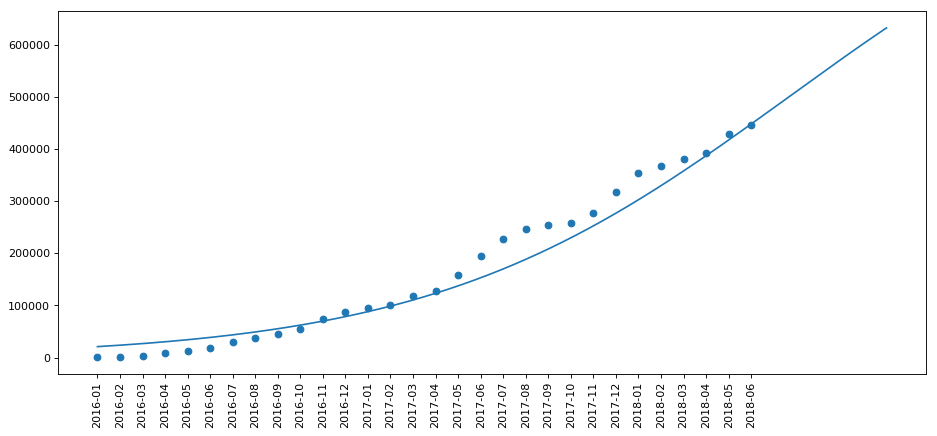

In [134]:
plt.figure(figsize=(14,6), dpi=80)
plt.xticks(rotation=90)
plt.scatter(student_row[:,0], Yi)
x=np.linspace(0,35,1000)
y = np.array([ insert_func(para, i ) for i in x])
plt.plot(x,y)
plt.show()

In [135]:
check_error(Xi, Yi, p0)

-42768.8645822
-0.0959750116851


In [67]:
Xi+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [70]:
Yi

array([   522,   1373,   3701,   8846,  13016,  19413,  29436,  38268,
        45513,  54570,  73981,  88102,  94725, 101028, 117889, 127271,
       159097, 194115, 227148, 247527, 254545, 258263, 277388, 317375,
       354029, 366903, 381509, 391479, 429156, 445625], dtype=uint64)

### VIP student count

In [136]:
def func_logsitic(p, x):
    c = 1e+5
    a, b = p
    return c / (1 + (c/a - 1) * np.exp(-b * x))

p0 = [50,0.1]
insert_func = func_logsitic

In [139]:
p0 = para 
Xi = np.array([i for i in range(len(vip_data))]) + 1
Yi = vip_data.cumsum()
para, cost = leastsq(cost_f, p0, args=(Xi,Yi))
print(para)
print(cost)

[  1.35434246e+03   1.64430110e-01]
1


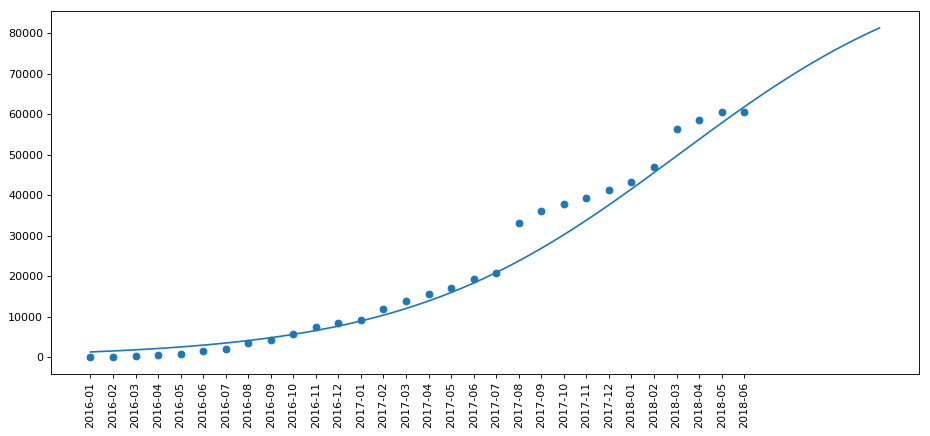

In [141]:
plt.figure(figsize=(14,6), dpi=80)
plt.xticks(rotation=90)
plt.scatter(vip_row[:,0], Yi)
y = np.array([ insert_func(para, i ) for i in x])
plt.plot(x,y)
plt.show()

In [143]:
check_error(Xi, Yi, p0)

compute: 66708.300883   actual: 60644.000000
6064.30088285
0.0999983655901


### user consume

In [9]:
s = pd.read_pickle('day_consum_2016.pkl')

In [10]:
#pd.to_pickle(s, 'day_consum_2016.pkl')

In [11]:
user_consume = np.array(s.values, dtype='uint32')
precent = 0.9 
inx = int(np.ceil(len(user_consume) * precent))
user_consume_train = user_consume[:inx]
user_consume_test = user_consume[inx:]

In [12]:
inx

822

In [175]:
def func_logsitic(p, x):
    # 极限数据 设置很关键
    c = 1e+7
    a, b = p
    return c / (1 + (c/a - 1) * np.exp(-b * x))
p0 = [50,0.1]
insert_func = func_logsitic
def cost_f(p, x, y):
    return insert_func(p, x) - y

In [176]:
p0 = para
Xi = np.array([i for i in range(len(user_consume_train))])
Yi = user_consume_train.cumsum()
para, cost = leastsq(cost_f, p0, args=(Xi,Yi))
print(para)
print(cost)

[  3.37805822e+04   6.37570651e-03]
1


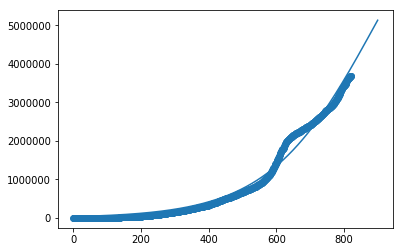

In [177]:
plt.scatter(Xi, Yi)
x=np.linspace(0,900, 901)
y = np.array([ insert_func(para, i) for i in x])
plt.plot(x,y)
plt.show()